In [1]:
import torch
%load_ext autoreload

# check if gpu is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [73]:
INPUT_SHAPE = (3, 128, 128)
IMG_SIZE = (128,128)
DATA_DIR = "data/celeb"
WORKERS = 2
BATCH_SIZE = 64
Z_DIM = 100
NUM_EPOCHES = 10
LR = 0.0002

# Loading celebrities data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


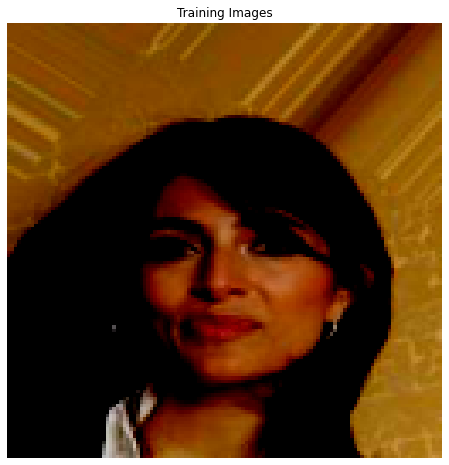

In [3]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

dataset = dset.ImageFolder(root=DATA_DIR,
                           transform=transforms.Compose([
                               transforms.Resize(IMG_SIZE),
                               transforms.CenterCrop(IMG_SIZE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=WORKERS)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
dataiter = iter(dataloader)
images, labels = dataiter.next()
plt.imshow(np.transpose(images[0].cpu().detach().numpy(), (1, 2, 0)))
# plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [75]:
%autoreload 2
from models.DCGAN import DCGAN

from torchsummary import summary

gan = DCGAN(
    input_shape = INPUT_SHAPE,
    z_dim = Z_DIM,
    num_epochs = NUM_EPOCHES,
    data_loader = dataloader,
    lr = LR,
    architecture = 1
)
summary(gan.discriminator, INPUT_SHAPE)
summary(gan.generator, (100,1,Z_DIM))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 64, 64]           2,304
         LeakyReLU-2           [-1, 48, 64, 64]               0
         Dropout2d-3           [-1, 48, 64, 64]               0
       BatchNorm2d-4           [-1, 48, 64, 64]              96
            Conv2d-5           [-1, 96, 32, 32]          73,728
         LeakyReLU-6           [-1, 96, 32, 32]               0
         Dropout2d-7           [-1, 96, 32, 32]               0
       BatchNorm2d-8           [-1, 96, 32, 32]             192
            Conv2d-9          [-1, 192, 16, 16]         294,912
        LeakyReLU-10          [-1, 192, 16, 16]               0
        Dropout2d-11          [-1, 192, 16, 16]               0
      BatchNorm2d-12          [-1, 192, 16, 16]             384
           Conv2d-13            [-1, 384, 8, 8]       1,179,648
        LeakyReLU-14            [-1, 38

In [ ]:
RUN = 2
save_dir = "./run/DCGAN/"+str(RUN)+"/"

import os
try:
    original_umask = os.umask(0)
    if not os.path.exists(save_dir+"imgs/"):
        os.makedirs(save_dir+"imgs/", 0o777)
finally:
    os.umask(original_umask)

STARTING_EPOCH = 2

G_losses, D_losses, img_list = gan.train(save_dir, STARTING_EPOCH)

Starting Training Loop...
[2/10][0/3166]	Loss_D: 0.9533	Loss_G: 2.7794	D(x): 0.6546	D(G(z)): 0.2864 / 0.1166
[2/10][50/3166]	Loss_D: 0.6470	Loss_G: 4.2442	D(x): 0.7629	D(G(z)): 0.1864 / 0.0280
[2/10][100/3166]	Loss_D: 0.4769	Loss_G: 3.9545	D(x): 0.8772	D(G(z)): 0.2332 / 0.0699
[2/10][150/3166]	Loss_D: 0.4485	Loss_G: 4.6980	D(x): 0.9461	D(G(z)): 0.2739 / 0.0164
[2/10][200/3166]	Loss_D: 0.4924	Loss_G: 4.1510	D(x): 0.7717	D(G(z)): 0.0697 / 0.0263
[2/10][250/3166]	Loss_D: 0.5231	Loss_G: 3.9827	D(x): 0.8593	D(G(z)): 0.1948 / 0.0333
[2/10][300/3166]	Loss_D: 0.5438	Loss_G: 3.5917	D(x): 0.7605	D(G(z)): 0.0372 / 0.0527
[2/10][350/3166]	Loss_D: 0.7567	Loss_G: 4.5154	D(x): 0.8278	D(G(z)): 0.2664 / 0.0216
[2/10][400/3166]	Loss_D: 0.6017	Loss_G: 4.2284	D(x): 0.8203	D(G(z)): 0.2116 / 0.0260
[2/10][450/3166]	Loss_D: 0.5580	Loss_G: 4.6332	D(x): 0.8586	D(G(z)): 0.2004 / 0.0200
[2/10][500/3166]	Loss_D: 0.4606	Loss_G: 4.3604	D(x): 0.8680	D(G(z)): 0.1835 / 0.0241
[2/10][550/3166]	Loss_D: 1.5450	Loss_G: 3.